In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('input/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
df.shape

(2905, 2)

In [4]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = m.make_future_dataframe(periods=365)
future.head().append(future.tail())

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [6]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.184438,7.453300,8.916738,6.839183,7.520172,1.018040,1.018040,1.018040,0.048285,0.048285,0.048285,0.969755,0.969755,0.969755,0.0,0.0,0.0,8.202479
3266,2017-01-16,7.183407,7.775297,9.221294,6.835605,7.520867,1.344066,1.344066,1.344066,0.352291,0.352291,0.352291,0.991775,0.991775,0.991775,0.0,0.0,0.0,8.527473
3267,2017-01-17,7.182375,7.547212,9.064502,6.832575,7.521563,1.132487,1.132487,1.132487,0.119637,0.119637,0.119637,1.012850,1.012850,1.012850,0.0,0.0,0.0,8.314861
3268,2017-01-18,7.181343,7.453181,8.890495,6.830565,7.522140,0.966116,0.966116,0.966116,-0.066662,-0.066662,-0.066662,1.032778,1.032778,1.032778,0.0,0.0,0.0,8.147459
3269,2017-01-19,7.180311,7.442050,8.856651,6.828578,7.522470,0.979053,0.979053,0.979053,-0.072262,-0.072262,-0.072262,1.051314,1.051314,1.051314,0.0,0.0,0.0,8.159363


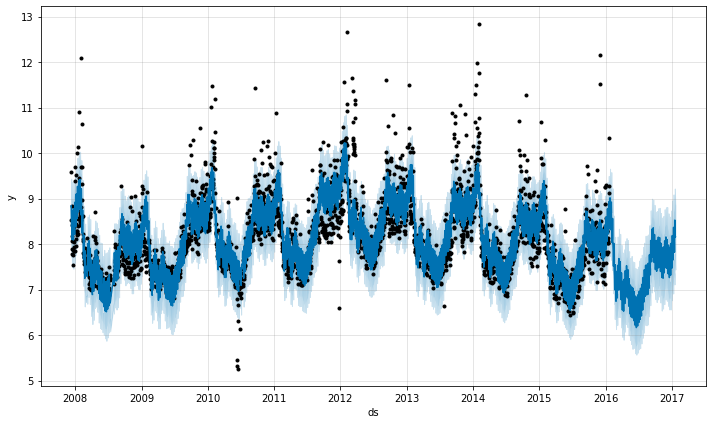

In [7]:
m.plot(forecast);

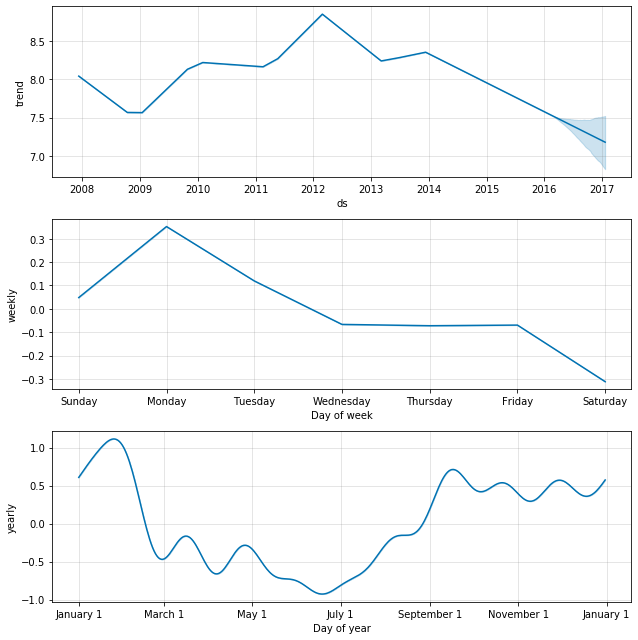

In [8]:
m.plot_components(forecast);

In [9]:
df = pd.read_csv('input/example_wp_R.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


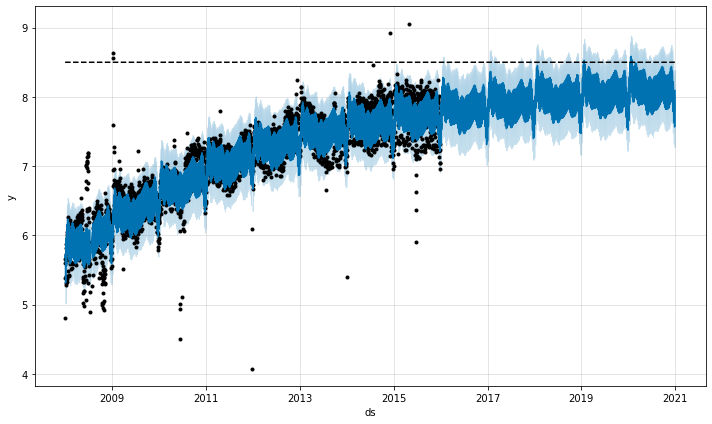

In [10]:
# 指定上限df['cap'] = 8.5
df['cap'] = 8.5
# growth: 'linear' or 'logistic'
m = Prophet(growth='logistic')
m.fit(df)
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


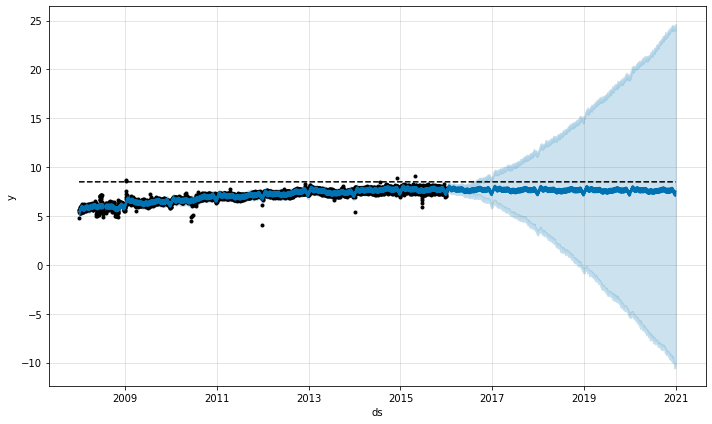

In [11]:
# changepoint_prior_scale: 正则化
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
m.plot(forecast);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


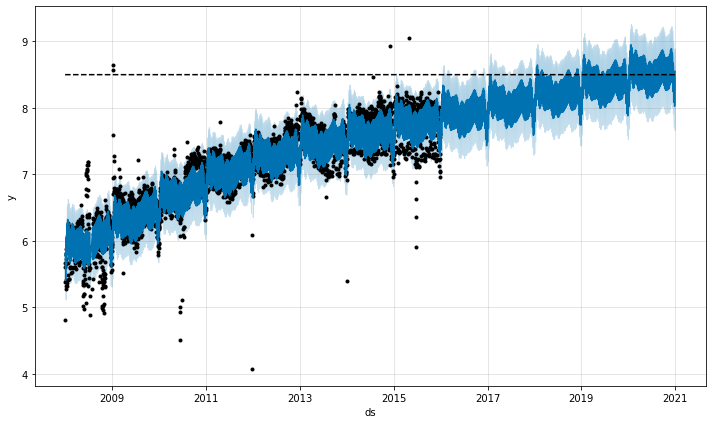

In [12]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
m.plot(forecast);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


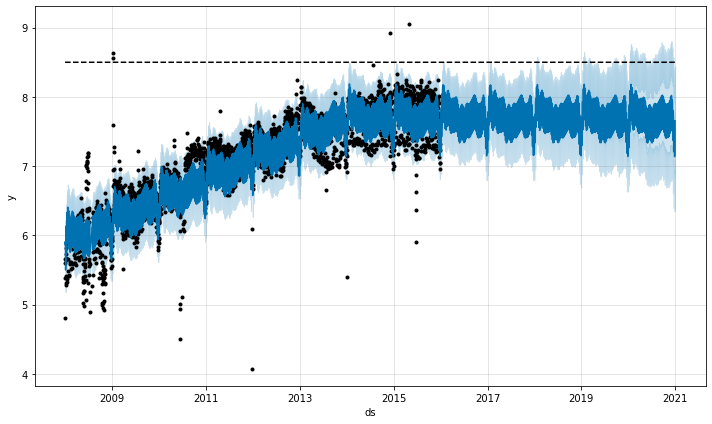

In [13]:
# 潜在的改变点
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
m.plot(forecast);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


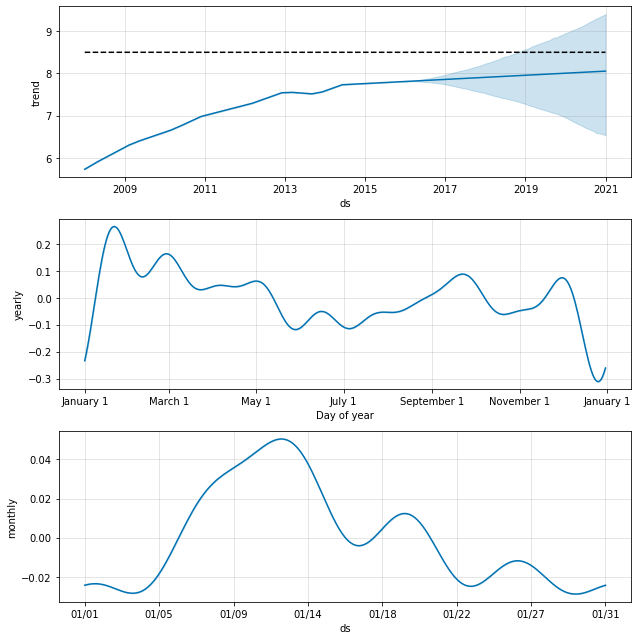

In [14]:
# weekly_seasonality
m = Prophet(weekly_seasonality=False)
# 
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
m.plot_components(forecast);

In [15]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [16]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2168,2014-02-02,0.040592,0.082773
2169,2014-02-03,0.029268,-0.018594
2510,2015-01-11,0.040592,0.000000
2511,2015-01-12,0.029268,0.000000
2879,2016-01-17,0.040592,0.000000
2880,2016-01-18,0.029268,0.000000
2886,2016-01-24,0.040592,0.000000
2887,2016-01-25,0.029268,0.000000
2900,2016-02-07,0.040592,0.082773
2901,2016-02-08,0.029268,-0.018594


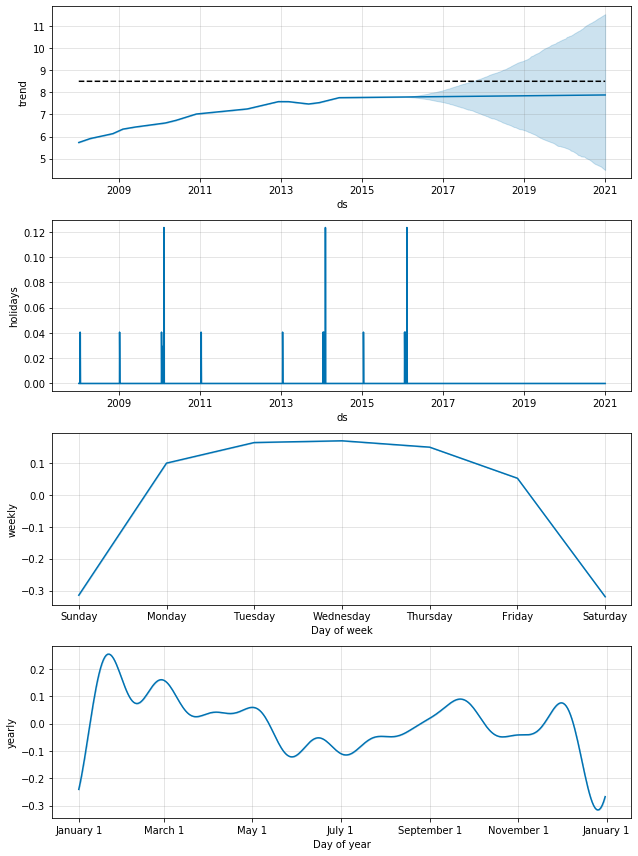

In [18]:
m.plot_components(forecast);